In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('BankNote_Authentication (1).csv')

In [ ]:
print(data)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [ ]:
X = data.drop(['class'], axis=1)
Y = data[['class']]


#Problem 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
for i in range(5):
    # Split data into train and test sets with a fixed ratio of 25%

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=i)

    # Train a Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the size of train and test sets and accuracy
    print(f"Experiment {i+1}:")
    print(f"Train set size: {len(X_train)}, Test set size: {len(X_test)}")
    print(f"Accuracy: {accuracy:.2f}\n")

Experiment 1:
Train set size: 1029, Test set size: 343
Accuracy: 0.98

Experiment 2:
Train set size: 1029, Test set size: 343
Accuracy: 0.99

Experiment 3:
Train set size: 1029, Test set size: 343
Accuracy: 0.98

Experiment 4:
Train set size: 1029, Test set size: 343
Accuracy: 0.97

Experiment 5:
Train set size: 1029, Test set size: 343
Accuracy: 0.99



In [ ]:
# Define the different train-test split ratios
split_ratios = [(0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3)]
# Define lists to store results
accuracy_results = []
tree_size_results = []

# Perform experiments for each split ratio
for split_ratio in split_ratios:
    accuracies = []
    tree_sizes = []
    for seed in range(5):
        # Split data into train and test sets with the current split ratio and seed
        X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=split_ratio[1], random_state=seed)

        # Train a Decision Tree classifier
        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Calculate tree size
        tree_size = clf.tree_.node_count
        tree_sizes.append(tree_size)

    # Store results for the current split ratio
    accuracy_results.append({
        'split_ratio': split_ratio,
        'mean_accuracy': np.mean(accuracies),
        'max_accuracy': np.max(accuracies),
        'min_accuracy': np.min(accuracies),
    })
    tree_size_results.append({
        'split_ratio': split_ratio,
        'mean_tree_size': np.mean(tree_sizes),
        'max_tree_size': np.max(tree_sizes),
        'min_tree_size': np.min(tree_sizes),
    })

# Print mean, max, and min accuracy for each split ratio
print("Accuracy Results:")
for result in accuracy_results:
    print(f"Split Ratio: {result['split_ratio']}, Mean Accuracy: {result['mean_accuracy']:.2f}, Max Accuracy: {result['max_accuracy']:.2f}, Min Accuracy: {result['min_accuracy']:.2f}")

# Print mean, max, and min tree size for each split ratio
print("\nTree Size Results:")
for result in tree_size_results:
    print(f"Split Ratio: {result['split_ratio']}, Mean Tree Size: {result['mean_tree_size']:.2f}, Max Tree Size: {result['max_tree_size']}, Min Tree Size: {result['min_tree_size']}")

Accuracy Results:
Split Ratio: (0.3, 0.7), Mean Accuracy: 0.97, Max Accuracy: 0.99, Min Accuracy: 0.96
Split Ratio: (0.4, 0.6), Mean Accuracy: 0.98, Max Accuracy: 0.99, Min Accuracy: 0.97
Split Ratio: (0.5, 0.5), Mean Accuracy: 0.97, Max Accuracy: 0.99, Min Accuracy: 0.97
Split Ratio: (0.6, 0.4), Mean Accuracy: 0.98, Max Accuracy: 0.99, Min Accuracy: 0.97
Split Ratio: (0.7, 0.3), Mean Accuracy: 0.98, Max Accuracy: 0.99, Min Accuracy: 0.98

Tree Size Results:
Split Ratio: (0.3, 0.7), Mean Tree Size: 30.60, Max Tree Size: 35, Min Tree Size: 23
Split Ratio: (0.4, 0.6), Mean Tree Size: 36.20, Max Tree Size: 47, Min Tree Size: 31
Split Ratio: (0.5, 0.5), Mean Tree Size: 43.00, Max Tree Size: 51, Min Tree Size: 33
Split Ratio: (0.6, 0.4), Mean Tree Size: 44.20, Max Tree Size: 49, Min Tree Size: 35
Split Ratio: (0.7, 0.3), Mean Tree Size: 49.00, Max Tree Size: 55, Min Tree Size: 43


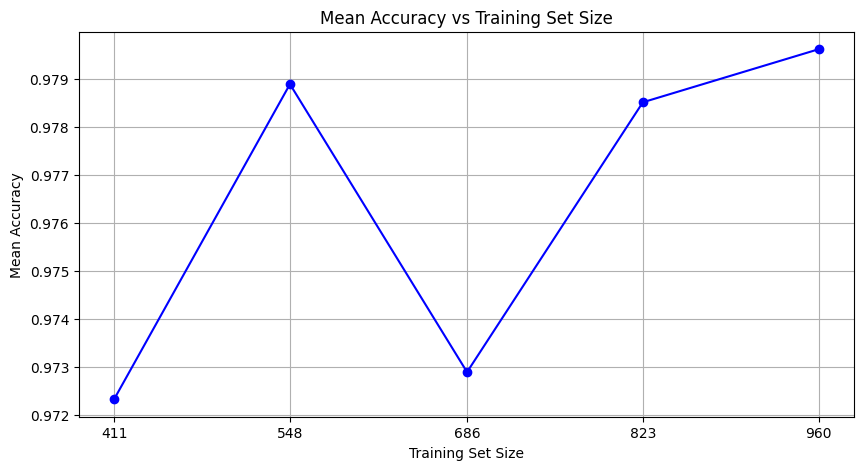

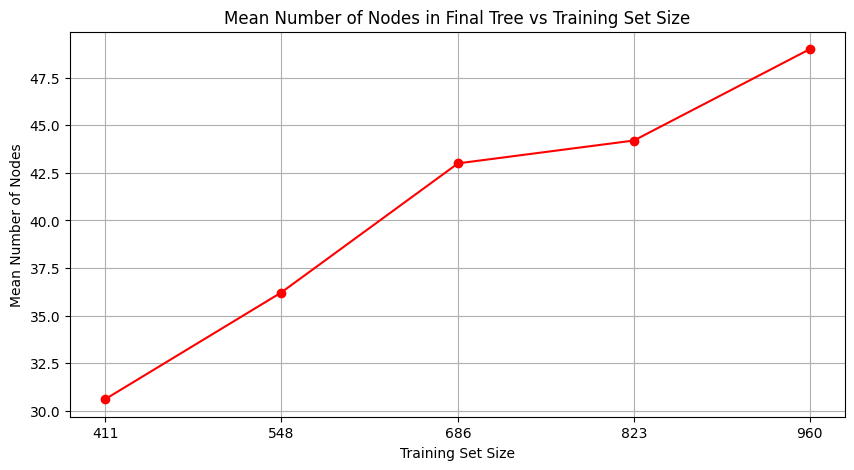

In [ ]:
import matplotlib.pyplot as plt

# Extract training set sizes, mean accuracies, and mean tree sizes
training_set_sizes = [int((1 - split_ratio[1]) * len(data)) for split_ratio in split_ratios]
mean_accuracies = [result['mean_accuracy'] for result in accuracy_results]
mean_tree_sizes = [result['mean_tree_size'] for result in tree_size_results]

# Plot mean accuracy against training set size
plt.figure(figsize=(10, 5))
plt.plot(training_set_sizes, mean_accuracies, marker='o', color='b')
plt.title('Mean Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(training_set_sizes)
plt.show()

# Plot mean number of nodes in the final tree against training set size
plt.figure(figsize=(10, 5))
plt.plot(training_set_sizes, mean_tree_sizes, marker='o', color='r')
plt.title('Mean Number of Nodes in Final Tree vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Number of Nodes')
plt.grid(True)
plt.xticks(training_set_sizes)
plt.show()


#Problem 2

In [ ]:
# Define function for normalizing features
def normalize_feature(feature, mean, std):
    return (feature - mean) / std

In [ ]:
# Define function for Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# Split data into training and testing sets
train_size = int(0.7 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]


In [ ]:
# Normalize features in the training set
means = train_data.mean()
stds = train_data.std()
train_data_normalized = train_data.copy()
for col in train_data.columns[:-1]:  # Exclude the last column (class)
    train_data_normalized[col] = normalize_feature(train_data[col], means[col], stds[col])



In [ ]:

# Normalize features in the testing set using the mean and standard deviation of the training data
test_data_normalized = test_data.copy()
for col in test_data.columns[:-1]:  # Exclude the last column (class)
    test_data_normalized[col] = normalize_feature(test_data[col], means[col], stds[col])

In [ ]:



# Function for computing Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to perform KNN classification with tie-breaking
def knn_classify(train_data, train_labels, test_instance, k):
    distances = np.zeros(len(train_data))

    for i in range(len(train_data)):
        distances[i] = euclidean_distance(train_data[i], test_instance)

    # Get indices of k nearest neighbors
    k_neighbors_indices = np.argsort(distances)[:k]

    # Use Voting to break ties
    class_votes = {}
    for idx in k_neighbors_indices:
        label = train_labels[idx]
        class_votes[label] = class_votes.get(label, 0) + 1

    # Find the class with the maximum votes
    max_votes = max(class_votes.values())
    tie_classes = [label for label, votes in class_votes.items() if votes == max_votes]

    # If there is a tie, select the class that comes first in the training file
    if len(tie_classes) > 1:
        for idx in k_neighbors_indices:
            label = train_labels[idx]
            if label in tie_classes:
                return label

    # Return the class with the maximum votes
    return max(class_votes, key=class_votes.get)

def train_test_split(data, labels, split_ratio=0.7):
    split_index = int(split_ratio * len(data))
    train_data, test_data = data[:split_index], data[split_index:]
    train_labels, test_labels = labels[:split_index], labels[split_index:]

    # Compute feature-wise means and standard deviations for training data
    feature_means = np.mean(train_data, axis=0)
    feature_stds = np.std(train_data, axis=0)

    # Normalize training data
    train_data_normalized = (train_data - feature_means) / feature_stds

    # Normalize test data using means and standard deviations from training data
    test_data_normalized = (test_data - feature_means) / feature_stds

    return train_data_normalized, train_labels, test_data_normalized, test_labels

# Function to evaluate KNN with different k values
def evaluate_knn(data, labels, k_values):
    accuracies = []

    for k in k_values:
        correct_classifications = 0

        for i in range(len(test_data)):
            predicted_label = knn_classify(train_data, train_labels, test_data[i], k)
            if predicted_label == test_labels[i]:
                correct_classifications += 1

        accuracy = correct_classifications / len(test_data) * 100
        accuracies.append(accuracy)

        print(f'k value: {k}\nNumber of correctly classified instances: {correct_classifications}\n'
              f'Total number of instances: {len(test_data)}\nAccuracy: {accuracy:.2f}%\n')

    # Calculate and print average accuracy
    avg_accuracy = np.mean(accuracies)
    print(f'Average Accuracy Across All Iterations: {avg_accuracy:.2f}%')

# Extract features and labels from the dataset
features = data.drop('class', axis=1).values
labels = data['class'].values

# Split data into training and testing sets with feature-wise normalization
train_data, train_labels, test_data, test_labels = train_test_split(features, labels)



# Define k values for iterations
k_values = [50, 51, 52,53,54,55,56,57,58,59]

# Evaluate KNN with different k values
evaluate_knn(test_data, test_labels, k_values)

k value: 50
Number of correctly classified instances: 373
Total number of instances: 412
Accuracy: 90.53%

k value: 51
Number of correctly classified instances: 371
Total number of instances: 412
Accuracy: 90.05%

k value: 52
Number of correctly classified instances: 372
Total number of instances: 412
Accuracy: 90.29%

k value: 53
Number of correctly classified instances: 365
Total number of instances: 412
Accuracy: 88.59%

k value: 54
Number of correctly classified instances: 366
Total number of instances: 412
Accuracy: 88.83%

k value: 55
Number of correctly classified instances: 365
Total number of instances: 412
Accuracy: 88.59%

k value: 56
Number of correctly classified instances: 365
Total number of instances: 412
Accuracy: 88.59%

k value: 57
Number of correctly classified instances: 364
Total number of instances: 412
Accuracy: 88.35%

k value: 58
Number of correctly classified instances: 364
Total number of instances: 412
Accuracy: 88.35%

k value: 59
Number of correctly class